In [2]:
from MDAnalysis import Universe
from MDAnalysis.analysis import pca
from pathlib import Path

In [3]:
#pdbs=Universe("glic_test/GLIC_ensemble.pdb")
#pdba=Universe("glyr_test/GLYR_ensemble.pdb")
pdbc=Universe("glic_glucl_glyr_test/GLYR_GLUCL_GLIC_ensemble.pdb")

/home/ozge/.local/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:434: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to zeros.
  warnings.warn("1 A^3 CRYST1 record,"


In [4]:
results=pca.PCA(pdbc)
results.run()

/home/ozge/.local/lib/python3.9/site-packages/MDAnalysis/coordinates/base.py:865: UserWarning: Reader has no dt information, set to 1.0 ps
  warnings.warn("Reader has no dt information, set to 1.0 ps")


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
orders=['correct_2XQ3_1.pdb','correct_2XQ4_1.pdb','correct_2XQ5_1.pdb','correct_2XQ6_1.pdb','correct_2XQ7_1.pdb','correct_2XQ8_1.pdb',
'correct_2XQ9_1.pdb','correct_2XQA_1.pdb','correct_3EAM_1.pdb','correct_3EHZ_1.pdb','correct_3EI0_1.pdb','correct_3LSV_1.pdb','correct_3P4W_1.pdb',
'correct_3P50_1.pdb','correct_3TLS_1.pdb','correct_3TLT_1.pdb','correct_3TLU_1.pdb','correct_3TLV_1.pdb','correct_3TLW_1.pdb','correct_3UU4_1.pdb',
'correct_3UU5_1.pdb','correct_3UU6_1.pdb','correct_3UU8_1.pdb','correct_3UUB_1.pdb','correct_3UUB_2.pdb','correct_4F8H_1.pdb','correct_4HFB_1.pdb',
'correct_4HFC_1.pdb','correct_4HFD_1.pdb','correct_4HFE_1.pdb','correct_4HFH_1.pdb','correct_4HFI_1.pdb','correct_4IL4_1.pdb','correct_4IL9_1.pdb',
'correct_4ILB_1.pdb','correct_4ILC_1.pdb','correct_4IRE_1.pdb','correct_4LMJ_1.pdb','correct_4LMK_1.pdb','correct_4LML_1.pdb','correct_4NPP_1.pdb',
'correct_4NPQ_1.pdb','correct_4NPQ_4.pdb','correct_4QH1_1.pdb','correct_4QH4_1.pdb','correct_4QH5_1.pdb','correct_4ZZB_1.pdb','correct_4ZZC_1.pdb',
'correct_5HCJ_1.pdb','correct_5HCM_1.pdb','correct_5HEG_1.pdb','correct_5HEH_1.pdb','correct_5IUX_1.pdb','correct_5J0Z_1.pdb','correct_5L47_1.pdb',
'correct_5L4E_1.pdb','correct_5L4H_1.pdb','correct_5MUO_1.pdb','correct_5MUR_1.pdb','correct_5MVM_1.pdb','correct_5MVN_1.pdb','correct_5MZQ_1.pdb',
'correct_5MZR_1.pdb','correct_5MZT_1.pdb','correct_5NJY_1.pdb','correct_5NKJ_1.pdb','correct_5V6N_1.pdb','correct_5V6O_1.pdb','correct_6EMX_1.pdb',
'correct_6F0I_1.pdb','correct_6F0J_1.pdb','correct_6F0M_1.pdb','correct_6F0N_1.pdb','correct_6F0R_1.pdb','correct_6F0U_1.pdb','correct_6F0V_1.pdb',
'correct_6F0Z_1.pdb','correct_6F10_1.pdb','correct_6F11_1.pdb','correct_6F12_1.pdb','correct_6F13_1.pdb','correct_6F15_1.pdb','correct_6F16_1.pdb',
'correct_6F7A_1.pdb','correct_6HJ3_1.pdb','correct_6HJA_1.pdb','correct_6HJB_1.pdb','correct_6HJI_1.pdb','correct_6HJZ_1.pdb','correct_6HJZ_2.pdb',
'correct_6HPP_1.pdb','correct_6HY5_1.pdb','correct_6HY9_1.pdb','correct_6HYA_1.pdb','correct_6HYV_1.pdb','correct_6HYW_1.pdb','correct_6HYX_1.pdb',
'correct_6HYZ_1.pdb','correct_6HZ0_1.pdb','correct_6HZ1_1.pdb','correct_6HZ3_1.pdb','correct_6HZW_1.pdb','correct_6I08_1.pdb']
ordera=['correct_3JAD_1.pdb','correct_3JAE_1.pdb','correct_3JAF_1.pdb','correct_6PLO_1.pdb','correct_6PLP_1.pdb','correct_6PLQ_1.pdb',
'correct_6PLR_1.pdb','correct_6PLS_1.pdb','correct_6PLT_1.pdb','correct_6PLU_1.pdb','correct_6PLV_1.pdb',
'correct_6PLW_1.pdb','correct_6PLX_1.pdb','correct_6PLY_1.pdb','correct_6PLZ_1.pdb','correct_6PM0_1.pdb',
'correct_6PM1_1.pdb','correct_6PM2_1.pdb','correct_6PM3_1.pdb','correct_6PM4_1.pdb','correct_6PM5_1.pdb',
'correct_6PM6_1.pdb','correct_6PXD_1.pdb','correct_6UBS_1.pdb','correct_6UBT_1.pdb','correct_6UD3_1.pdb',
'correct_6VM0_1.pdb','correct_6VM2_1.pdb','correct_6VM3_1.pdb']
orderc=["correct_2XQ3_1.pdb","correct_2XQ4_1.pdb","correct_2XQ5_1.pdb","correct_2XQ6_1.pdb","correct_2XQ7_1.pdb","correct_2XQ8_1.pdb","correct_2XQ9_1.pdb",
        "correct_2XQA_1.pdb","correct_3EAM_1.pdb","correct_3EHZ_1.pdb","correct_3EI0_1.pdb","correct_3JAD_1.pdb","correct_3JAE_1.pdb","correct_3JAF_1.pdb",
        "correct_3LSV_1.pdb","correct_3P4W_1.pdb","correct_3P50_1.pdb","correct_3RHW_1.pdb","correct_3RI5_1.pdb","correct_3RIA_1.pdb","correct_3RIF_1.pdb",
        "correct_3TLS_1.pdb","correct_3TLT_1.pdb","correct_3TLU_1.pdb","correct_3TLV_1.pdb","correct_3TLW_1.pdb","correct_3UU4_1.pdb","correct_3UU5_1.pdb",
        "correct_3UU6_1.pdb","correct_3UU8_1.pdb","correct_3UUB_1.pdb","correct_3UUB_2.pdb","correct_4F8H_1.pdb","correct_4HFB_1.pdb","correct_4HFC_1.pdb",
        "correct_4HFD_1.pdb","correct_4HFE_1.pdb","correct_4HFH_1.pdb","correct_4HFI_1.pdb","correct_4IL4_1.pdb","correct_4IL9_1.pdb","correct_4ILA_1.pdb",
        "correct_4ILB_1.pdb","correct_4ILC_1.pdb","correct_4IRE_1.pdb","correct_4LMJ_1.pdb","correct_4LMK_1.pdb","correct_4LML_1.pdb","correct_4NPP_1.pdb",
        "correct_4NPQ_1.pdb","correct_4QH1_1.pdb","correct_4QH4_1.pdb","correct_4QH5_1.pdb","correct_4TNV_1.pdb","correct_4TNV_2.pdb","correct_4TNW_1.pdb",
        "correct_4TNW_2.pdb","correct_4ZZB_1.pdb","correct_4ZZC_1.pdb","correct_5HCJ_1.pdb","correct_5HCM_1.pdb","correct_5HEG_1.pdb","correct_5HEH_1.pdb",
        "correct_5IUX_1.pdb","correct_5J0Z_1.pdb","correct_5L47_1.pdb","correct_5L4E_1.pdb","correct_5L4H_1.pdb","correct_5MUO_1.pdb","correct_5MUR_1.pdb",
        "correct_5MVM_1.pdb","correct_5MVN_1.pdb","correct_5MZQ_1.pdb","correct_5MZR_1.pdb","correct_5MZT_1.pdb","correct_5NJY_1.pdb","correct_5NKJ_1.pdb",
        "correct_5TIN_1.pdb","correct_5TIO_1.pdb","correct_5V6N_1.pdb","correct_5V6O_1.pdb","correct_5VDH_1.pdb","correct_5VDI_1.pdb","correct_6EMX_1.pdb",
        "correct_6F0I_1.pdb","correct_6F0J_1.pdb","correct_6F0M_1.pdb","correct_6F0N_1.pdb","correct_6F0R_1.pdb","correct_6F0U_1.pdb","correct_6F0V_1.pdb",
        "correct_6F0Z_1.pdb","correct_6F10_1.pdb","correct_6F11_1.pdb","correct_6F12_1.pdb","correct_6F13_1.pdb","correct_6F15_1.pdb","correct_6F16_1.pdb",
        "correct_6F7A_1.pdb","correct_6HJ3_1.pdb","correct_6HJA_1.pdb","correct_6HJB_1.pdb","correct_6HJI_1.pdb","correct_6HJZ_1.pdb","correct_6HJZ_2.pdb",
        "correct_6HPP_1.pdb","correct_6HY5_1.pdb","correct_6HY9_1.pdb","correct_6HYA_1.pdb","correct_6HYV_1.pdb","correct_6HYW_1.pdb","correct_6HYX_1.pdb",
        "correct_6HYZ_1.pdb","correct_6HZ0_1.pdb","correct_6HZ1_1.pdb","correct_6HZ3_1.pdb","correct_6HZW_1.pdb","correct_6I08_1.pdb","correct_6PLO_1.pdb",
        "correct_6PLP_1.pdb","correct_6PLQ_1.pdb","correct_6PLR_1.pdb","correct_6PLS_1.pdb","correct_6PLT_1.pdb","correct_6PLU_1.pdb","correct_6PLV_1.pdb",
        "correct_6PLW_1.pdb","correct_6PLX_1.pdb","correct_6PLY_1.pdb","correct_6PLZ_1.pdb","correct_6PM0_1.pdb","correct_6PM1_1.pdb","correct_6PM2_1.pdb",
        "correct_6PM3_1.pdb","correct_6PM4_1.pdb","correct_6PM5_1.pdb","correct_6PM6_1.pdb","correct_6PXD_1.pdb","correct_6UBS_1.pdb","correct_6UBT_1.pdb",
        "correct_6UD3_1.pdb","correct_6VM0_1.pdb","correct_6VM2_1.pdb","correct_6VM3_1.pdb","correct_6ZGJ_1.pdb","correct_6ZGK_1.pdb"]
transformed = results.transform(pdbc.select_atoms("all"), n_components=5)
transformed.shape
df = pd.DataFrame(transformed,
                  columns=['PC{}'.format(i+1) for i in range(5)])
df["order"]=orderc
df.head()

/home/ozge/.local/lib/python3.9/site-packages/MDAnalysis/coordinates/PDB.py:434: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to zeros.
  warnings.warn("1 A^3 CRYST1 record,"


,PC1,PC2,PC3,PC4,PC5,order
0,-21.374976,-5.162751,-44.817286,0.288937,0.848361,correct_2XQ3_1.pdb
1,-21.779993,-3.583969,-45.732550,0.242218,1.400270,correct_2XQ4_1.pdb
2,-21.656211,-4.938044,-44.885739,0.927410,1.143166,correct_2XQ5_1.pdb
3,-21.476526,-5.315092,-44.790517,0.263643,0.654024,correct_2XQ6_1.pdb
4,-18.657236,-3.213403,-39.600098,-0.342237,-2.399884,correct_2XQ7_1.pdb


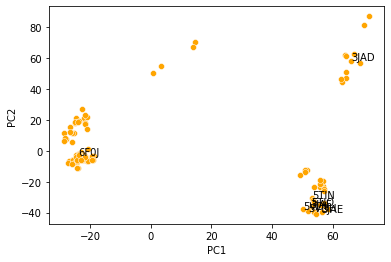

In [7]:
import seaborn as sns

p=sns.scatterplot(data=df,x="PC1",y="PC2",color="orange")
for _,row in df.iterrows():
    if row.order.split("_")[1] in ['3JAD','3JAF','3JAE','5CFB','5TIN','5TIO','5VDH','5VDI','6F0J']:
        plt.text(x=row.PC1, y=row.PC2, s=row.order.split("_")[1])